# Face Blurring

## Blurring Image

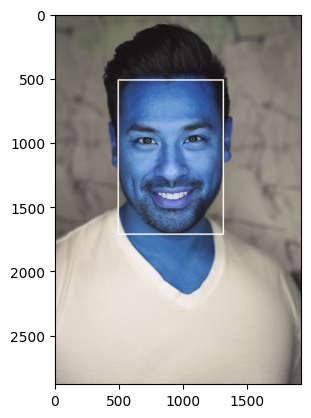

In [2]:
from skimage import data, io, filters
from retinaface import RetinaFace
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('img.jpg')
faces = RetinaFace.detect_faces('img.jpg')
for face in faces.keys():
    face = faces[face]
    facial_area = face['facial_area']

    cv2.rectangle(img, (facial_area[2], facial_area[3]), (facial_area[0], facial_area[1]), (255, 255, 255), 10)

# plt.imshow(img[:, :, ::-1])
plt.imshow(img)
plt.show()
